# **Muhammad Abdiel Firjatullah**

# **Recommendation System - Rekomendasi Judul Film Berdasarkan Genre**

# **Deskripsi Proyek**

Pada proyek kali ini sebuah perusahaan yang bergerak di industri perfilman ingin meningkatkan traffic platform film streaming mereka, oleh karena itu perusahaan akan mencoba menerapkan pendekatan Machine Learning untuk merekomendasi film-film yang mereka sediakan berdasarkan genre filmnya.

# **1. Import Library yang Dibutuhkan**

## Install Public  API Kaggle

In [1]:
%pip install -q kaggle

## Install library untuk proses data loading dan visualisasi data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# **2. Data Understanding**

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

## **2.1 Data Loading**

Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.             


*Dataset yang digunakan pada proyek ini:*  
https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset

In [46]:
# Membuat direktori baru bernama kaggle
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke direktori kaggle
!mv kaggle.json ~/.kaggle/kaggle.json

# Mengubah permission berkas
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d gargmanas/movierecommenderdataset

# Ekstrak berkas zip
!unzip /content/movierecommenderdataset.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset
License(s): GPL-2.0
  0% 0.00/846k [00:00<?, ?B/s]
100% 846k/846k [00:00<00:00, 104MB/s]
Archive:  /content/movierecommenderdataset.zip
  inflating: movies.csv              
  inflating: ratings.csv             


## Melihat isi dataset movies.csv

In [47]:
movies = pd.read_csv('/content/movies.csv')
# values = ['Comedy','Action','Adventure','Documentary','Horror','Crime','Drama','Romance','Thriller','Mystery', 'Animation', 'Fantasy']
# movies = movies[movies.genres.isin(values) == True]

movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## Melihat isi dataset ratings.csv

In [48]:
rating = pd.read_csv('/content/ratings.csv')
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### **2.2 Exploratory Data Analysis (EDA)**

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data

#### **2.2.1 EDA - Deskripsi Variabel**

## Melihat informasi pada dataset movies

In [49]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


## Melihat informasi pada dataset ratings

In [50]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


#### **2.2.2 EDA - Univariate Analysis**

##### **- Movies**




In [51]:
# Melihat jumlah film dan jumlah genre yang ada beserta nama genrenya
print('Jumlah Film: ', len(movies.movieId.unique()))
print('Jumlah genre: ', len(movies.genres.unique()))
print('Genre: ', movies.genres.unique())

Jumlah Film:  9742
Jumlah genre:  951
Genre:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'D

## Visualisasi fitur 'genres' untuk melihat pembagian isi datasetnya

                                                    jumlah film  persentase
genres                                                                     
Drama                                                      1053        10.8
Comedy                                                      946         9.7
Comedy|Drama                                                435         4.5
Comedy|Romance                                              363         3.7
Drama|Romance                                               349         3.6
...                                                         ...         ...
Action|Crime|Horror|Mystery|Thriller                          1         0.0
Adventure|Animation|Children|Comedy|Musical|Rom...            1         0.0
Action|Adventure|Animation|Comedy|Crime|Mystery               1         0.0
Children|Comedy|Fantasy|Sci-Fi                                1         0.0
Action|Animation|Comedy|Fantasy                               1         0.0

[951 rows x

<Axes: title={'center': 'genres'}, xlabel='genres'>

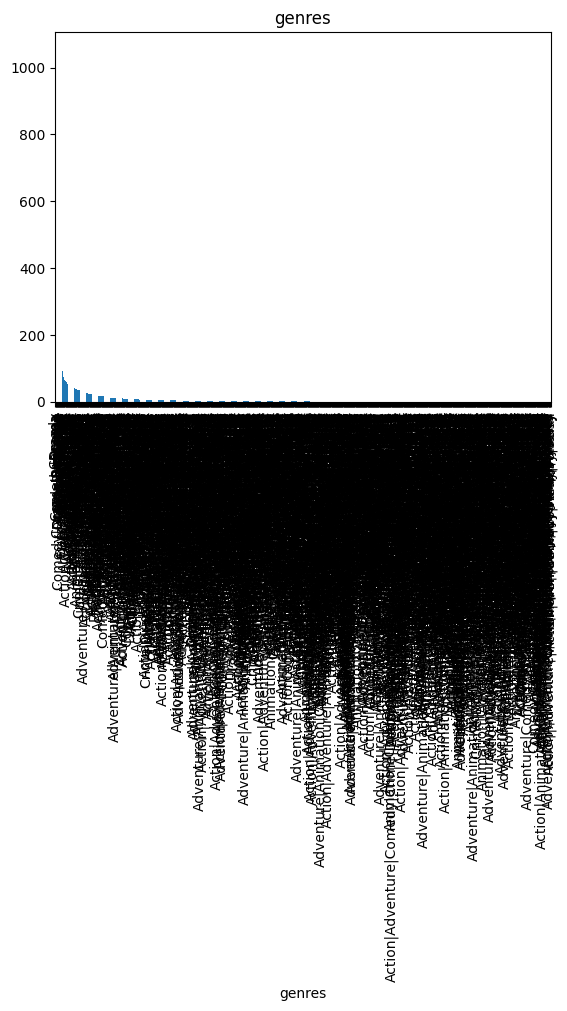

In [52]:
categorical_features = ['genres']
feature = categorical_features[0]
count = movies[feature].value_counts()
percent = 100*movies[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah film':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

##### **- Rating**

In [53]:
# Melihat jumlah userID dan jumlah data rating
print('Jumlah userID: ', len(rating.userId.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah userID:  610
Jumlah data rating:  100836


## Visualisasi fitur numerik yang ada di dataset rating

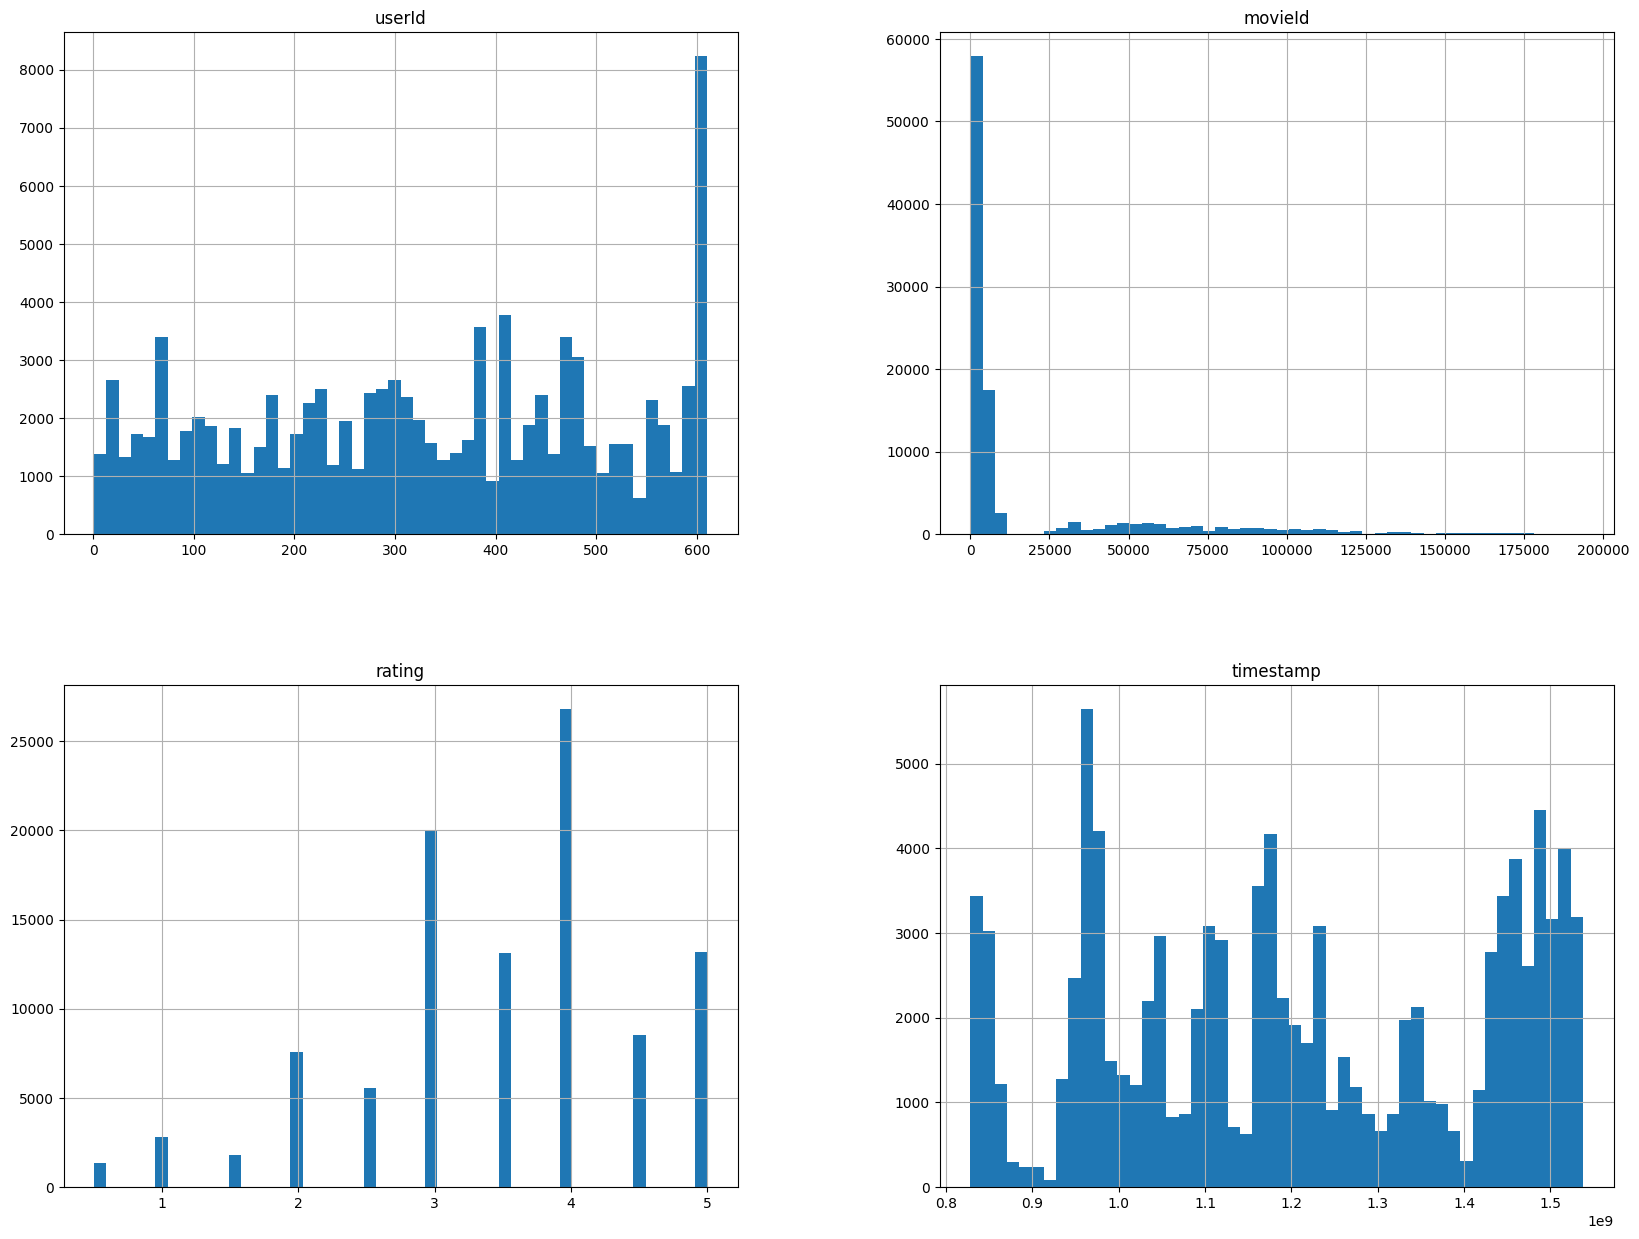

In [54]:
rating.hist(bins=50, figsize=(20,15))
plt.show()

## **3. Data Preparation**

Data Preparation merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap pembuatan model Machine Learning.

### **3.1 Menggabungkan Dataset dan Menangani Missing Value**

In [55]:
# Menggabungkan dataset movies dan rating
all_movies = pd.merge(movies, rating, on='movieId', how='left')
all_movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09
...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09
100851,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09


## Melihat data yang kosong

In [56]:
all_movies.isnull().sum()

movieId       0
title         0
genres        0
userId       18
rating       18
timestamp    18
dtype: int64

## Membuang data yang kosong

In [57]:
all_movies_clean = all_movies.dropna()
all_movies_clean

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09
...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09
100851,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09


## Menampilkan data dan mengurutkannya berdasarkan movieId

In [58]:
fix_movies = all_movies_clean.sort_values('movieId', ascending=True)
fix_movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
137,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,382.0,4.5,1.515163e+09
138,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,385.0,4.0,8.346916e+08
139,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,389.0,5.0,8.579342e+08
140,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,391.0,3.0,1.032388e+09
...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09
100851,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09


## Melihat berapa jumlah film dalam fix_movies

In [59]:
len(fix_movies.movieId.unique())

9724

## Melihat genre movie setelah data dirapihkan

In [60]:
print('Genre: ', fix_movies.genres.unique())

Genre:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'Drama|Horror|Thriller' 'Comedy|Horror|R

### **3.2 Menghapus Data Duplikat**

In [61]:
# Menghapus data duplikat pada variabel preparation
preparation = fix_movies.drop_duplicates('movieId')
preparation

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
286,2,Jumanji (1995),Adventure|Children|Fantasy,436.0,4.0,8.335298e+08
362,3,Grumpier Old Men (1995),Comedy|Romance,448.0,3.0,1.019129e+09
381,4,Waiting to Exhale (1995),Comedy|Drama|Romance,262.0,1.0,8.403062e+08
411,5,Father of the Bride Part II (1995),Comedy,353.0,3.0,8.319399e+08
...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09
100851,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09


### **3.3 Mengonversi Data Series Menjadi Bentuk List**

In [62]:
# Mengonversi data series ‘movieId’ menjadi bentuk list
movie_id = preparation['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi bentuk list
movie_title = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi bentuk list
movie_genre = preparation['genres'].tolist()

print(len(movie_id))
print(len(movie_title))
print(len(movie_genre))

9724
9724
9724


## Membuat dictionary data

In [63]:
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_title': movie_title,
    'genre': movie_genre
})
movie_new

,id,movie_title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,193585,Flint (2017),Drama
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## Melihat 5 sampel movie

In [64]:
data = movie_new
data.sample(5)

,id,movie_title,genre
2972,3988,How the Grinch Stole Christmas (a.k.a. The Gri...,Children|Comedy|Fantasy
3716,5146,Vampire Hunter D: Bloodlust (Banpaia hantâ D) ...,Animation|Fantasy|Horror|Sci-Fi
1357,1855,Krippendorf's Tribe (1998),Comedy
7183,72694,Shrink (2009),Drama
6976,67267,Sunshine Cleaning (2008),Comedy|Drama


## **4. Model Development - Content Based Filtering**

Ide dari sistem rekomendasi berbasis konten (content-based filtering) adalah merekomendasikan item yang mirip dengan item yang disukai pengguna di masa lalu.

### **4.1 TF-IDF Vectorizer**

In [68]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer(stop_words='english')

# Menggabungkan genre menjadi string tunggal
# data['genre'] = data['genre'].apply(lambda x: ' '.join(x))
# print(data)

# Melakukan perhitungan idf pada data genre
tf.fit(data['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

## Melakukan fit lalu ditransformasikan ke bentuk matrix dan Melihat ukuran matrix TF-IDF

In [69]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9724, 23)

## Mengubah vektor TF-IDF dalam bentuk matriks dengan fungsi todense()

In [70]:
tfidf_matrix.todense()

matrix([[0.        , 0.41681721, 0.51634045, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51235785, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.57836121, 0.        , 0.8157808 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

## Membuat dataframe untuk melihat TF-IDF matrix

In [71]:
# Kolom diisi dengan genre
# Baris diisi dengan movie title

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.movie_title
).sample(12, axis=1).sample(10, axis=0)

,film,drama,romance,noir,horror,sci,mystery,imax,listed,war,fantasy,children
movie_title,,,,,,,,,,,,
Buster's Mal Heart (2017),0.0,0.426233,0.0,0.0,0.00000,0.000000,0.904614,0.0,0.0,0.0,0.000000,0.000000
Exodus: Gods and Kings (2014),0.0,0.407194,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
Nocturnal Animals,0.0,0.564576,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
Escape to Witch Mountain (1975),0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.593769,0.620425
Planet Earth (2006),0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
"Fly, The (1986)",0.0,0.275877,0.0,0.0,0.50404,0.503572,0.000000,0.0,0.0,0.0,0.000000,0.000000
Witness for the Prosecution (1957),0.0,0.361748,0.0,0.0,0.00000,0.000000,0.767755,0.0,0.0,0.0,0.000000,0.000000
Flirting (1991),0.0,1.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
Manchester by the Sea (2016),0.0,1.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


### **4.2 Cosine Similarity**

## Menghitung cosine similarity pada matrix TF-IDF

In [72]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.81352752, 0.15262722, ..., 0.        , 0.42122062,
        0.26751731],
       [0.81352752, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15262722, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57053212],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42122062, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26751731, 0.        , 0.57053212, ..., 0.        , 0.        ,
        1.        ]])

## Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa movie title

In [73]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['movie_title'], columns=data['movie_title'])
print('Shape:', cosine_sim_df.shape)

Shape: (9724, 9724)


## Melihat similarity matrix pada setiap movie title

In [74]:
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

movie_title,Marty (1955),Cheaper by the Dozen 2 (2005),Child's Play 2 (1990),The Idolmaker (1980),Desperado (1995)
movie_title,,,,,
Confessions of a Teenage Drama Queen (2004),0.000000,0.540134,0.000000,0.000000,0.0000
Billy Elliot (2000),0.540394,0.000000,0.000000,0.540394,0.0000
The Magician (1958),0.540394,0.000000,0.000000,0.540394,0.0000
"Evil Dead, The (1981)",0.000000,0.000000,0.767712,0.000000,0.0000
Daria: Is It Fall Yet? (2000),0.000000,0.248476,0.000000,0.000000,0.0000
"Fallen Idol, The (1948)",0.195486,0.000000,0.330418,0.195486,0.0000
Miss March (2009),0.000000,0.540134,0.000000,0.000000,0.0000
Pierrot le fou (1965),0.272196,0.000000,0.000000,0.272196,0.0000
Captain America: Civil War (2016),0.000000,0.000000,0.275500,0.000000,0.1871


### **4.3 Membuat Fungsi movie_recommendation()**

In [138]:
def movie_recommendations(movie_title, similarity_data=cosine_sim_df, items=data[['movie_title', 'genre']], k=10):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,movie_title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Membuang movie_title agar nama film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movie_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

### **4.4. Result**

## Melihat genre film yang akan diuji

In [136]:
movie_title = 'Piper (2016)'
data[data.movie_title.eq(movie_title)]

,id,movie_title,genre
9322,160718,Piper (2016),Animation


## Menampilkan hasil rekomendasi judul film berdasarkan genre

In [137]:
movie_title = 'Piper (2016)'
movie_recommendations = movie_recommendations(movie_title)
movie_recommendations

,movie_title,genre
0,Merry Madagascar (2009),Animation
1,Investigation Held by Kolobki (1986),Animation
2,"Illusionist, The (L'illusionniste) (2010)",Animation
3,Vacations in Prostokvashino (1980),Animation
4,Winnie the Pooh Goes Visiting (1971),Animation
5,DC Super Hero Girls: Hero of the Year (2016),Animation
6,Winnie the Pooh and the Day of Concern (1972),Animation
7,Hulk Vs. (2009),Animation
8,A Plasticine Crow (1981),Animation
9,Asterix: The Land of the Gods (Astérix: Le dom...,Animation


## **5. Evaluation**

Metrik yang cocok dipakai untuk kasus content based filtering adalah ***Precision***, yang dapat dirumuskan sebagai berikut:



![img](https://dicoding-web-img.sgp1.cdn.digitaloceanspaces.com/original/academy/dos:819311f78d87da1e0fd8660171fa58e620211012160253.png)

Berdasarkan hasil di atas dapat disimpulkan bahwa dari 10 judul film yang direkomendasikan, ada 10 item yang relevan, oleh karena itu ***Precision*** dari model tersebut adalah 10/10 atau 100%